In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
val = np.arange(1, 2001)
data = {"val1": val, "val2": val, "sum": val + val}
df = pd.DataFrame(data)

In [12]:
y = df["sum"].values
x = df.drop("sum", axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=30)

In [13]:
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1),
])

model.compile(loss="mse", optimizer=Adam(learning_rate=0.01))
model.fit(x=x_train, y=y_train, epochs=300, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/300
57/57 [==============================] - 1s 3ms/step - loss: 240154.7188 - val_loss: 234.3928
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 465.6365 - val_loss: 9.1658
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 0.9345 - val_loss: 0.0628
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0592
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0564
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0572
Epoch 7/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0538
Epoch 8/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0522
Epoch 9/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0517
Epoch 10/300
57/57 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0505


<AxesSubplot:>

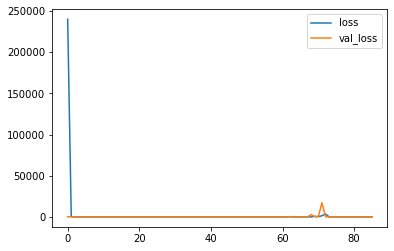

In [14]:
pd.DataFrame(model.history.history).plot()

In [15]:
predicts = model.predict(x_test)
r2_score(y_test, predicts)

0.9999999731489692

In [16]:
mean_absolute_error(y_test, predicts)

0.1854367160797119

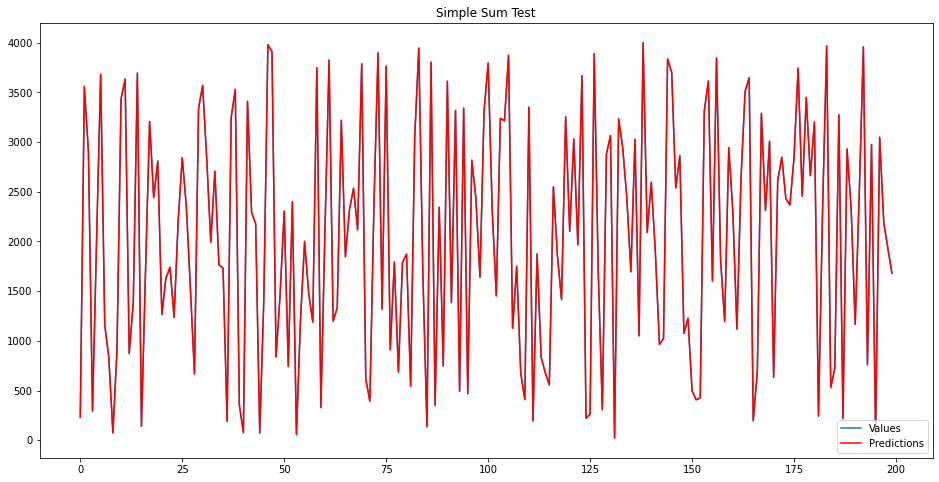

In [17]:
plt.figure(figsize=(16,8))
plt.title('Simple Sum Test')
plt.plot(y_test)
plt.plot(predicts,color="Red")
plt.legend(['Values','Predictions'],loc='lower right')

In [18]:
model.predict([[4550,4550]])

array([[9100.54]], dtype=float32)

In [19]:
# model.save("sum.h5")